In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from datetime import datetime

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
XLE_monthly = pd.read_csv('/content/drive/MyDrive/6401-etf-usdx-project/data 10 years/XLE-monthly.csv')

XLE_monthly['Date'] = pd.to_datetime(XLE_monthly['Date'], infer_datetime_format=True)
XLE_monthly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,27.312500,29.468750,25.875000,27.312500,16.105865,5903600
1,2000-02-01,27.312500,27.609375,24.625000,26.156250,15.424033,4213000
2,2000-03-01,26.015625,30.218750,25.937500,29.312500,17.285234,8607600
3,2000-04-01,29.500000,30.156250,27.515625,28.875000,17.084299,5818900
4,2000-05-01,29.187500,32.312500,29.000000,32.265625,19.090414,5148800
...,...,...,...,...,...,...,...
260,2021-09-01,48.349998,53.830002,46.470001,52.090000,51.464752,681489300
261,2021-10-01,52.470001,59.410000,52.470001,57.470001,57.470001,694406900
262,2021-11-01,58.040001,59.400002,54.139999,54.590000,54.590000,599107600
263,2021-12-01,55.869999,56.580002,53.400002,55.139999,55.139999,133074600


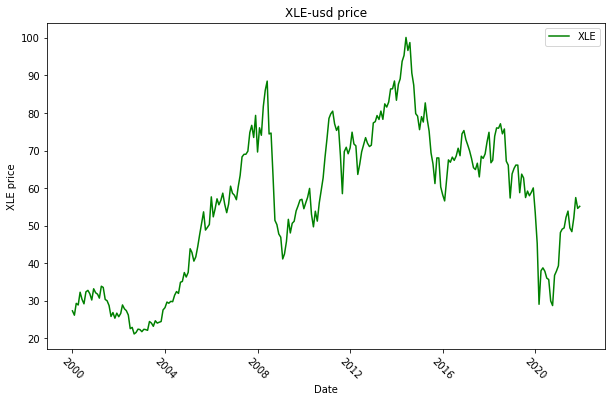

In [52]:
line = plt.plot(XLE_monthly['Date'],XLE_monthly['Close'], 'green',label = 'XLE')
plt.title('XLE-usd price')
plt.legend()
plt.xticks(rotation = -45)
plt.xlabel("Date")
plt.ylabel("XLE price")
plt.show()

In [53]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [54]:
XLE_monthly.drop(columns=(['Open','High','Low','Adj Close','Volume']),axis=1,inplace=True)
indexedXLE_monthly=XLE_monthly.set_index(['Date'])
indexedXLE_monthly

,Close
Date,
2000-01-01,27.312500
2000-02-01,26.156250
2000-03-01,29.312500
2000-04-01,28.875000
2000-05-01,32.265625
...,...
2021-09-01,52.090000
2021-10-01,57.470001
2021-11-01,54.590000


https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

reference 

In [55]:
#From the plot below, we can see that there is an upward trend compoenent and then a downward trend in th series. 
#Hence, theoretically this is not qualified for a Time Series, but we still want to see what will happen. We now check for stationarity of the data
#Determine rolling statistics
rolmean = indexedXLE_monthly.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedXLE_monthly.rolling(window=12).std()
print(rolmean,rolstd)

                Close
Date                 
2000-01-01        NaN
2000-02-01        NaN
2000-03-01        NaN
2000-04-01        NaN
2000-05-01        NaN
...               ...
2021-09-01  45.438333
2021-10-01  47.834167
2021-11-01  49.320000
2021-12-01  50.756667
2021-12-03  52.075000

[265 rows x 1 columns]                Close
Date                
2000-01-01       NaN
2000-02-01       NaN
2000-03-01       NaN
2000-04-01       NaN
2000-05-01       NaN
...              ...
2021-09-01  7.808749
2021-10-01  6.516554
2021-11-01  5.749561
2021-12-01  4.693514
2021-12-03  3.160553

[265 rows x 1 columns]


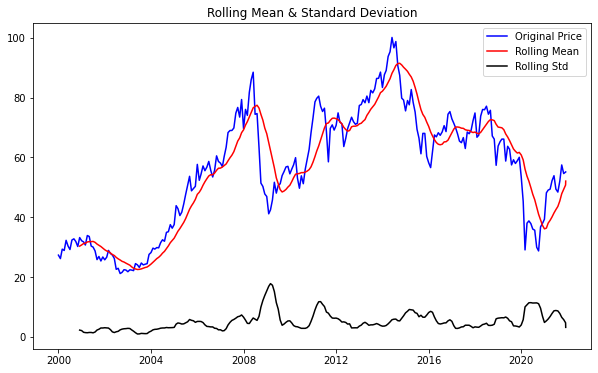

In [56]:
#Plot rolling statistics
orig = plt.plot(indexedXLE_monthly, color='blue', label='Original Price')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best') #upper left location
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
'''

"From the above graph, we see that rolling mean itself has a trend component even though 
rolling standard deviation is fairly constant with time. For our time series to be stationary, 
we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. 
Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test."

'''


In [58]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedXLE_monthly['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.933103
p-value                          0.316652
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


#Log Scale Transformation

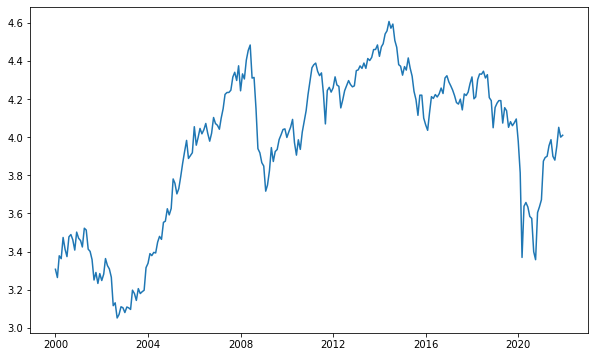

In [59]:
#Estimating trend
indexedXLE_monthly_logScale = np.log(indexedXLE_monthly)
plt.plot(indexedXLE_monthly_logScale)

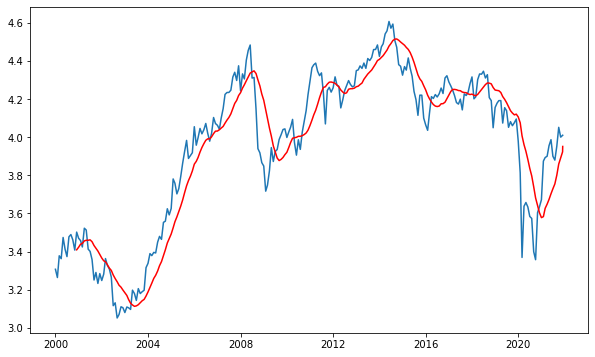

In [60]:
#The below transformation is required to make series stationary
movingAverage = indexedXLE_monthly_logScale.rolling(window=12).mean()
movingXLE = indexedXLE_monthly_logScale.rolling(window=12).std()
plt.plot(indexedXLE_monthly_logScale)
plt.plot(movingAverage, color='red')


In [61]:
datasetLogScaleMinusMovingAverage = indexedXLE_monthly_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Close
Date,
2000-12-01,0.092885
2001-01-01,0.046964
2001-02-01,0.018628
2001-03-01,-0.018541
2001-04-01,0.066430
2001-05-01,0.053684
2001-06-01,-0.046574
2001-07-01,-0.060461
2001-08-01,-0.093763


In [62]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    



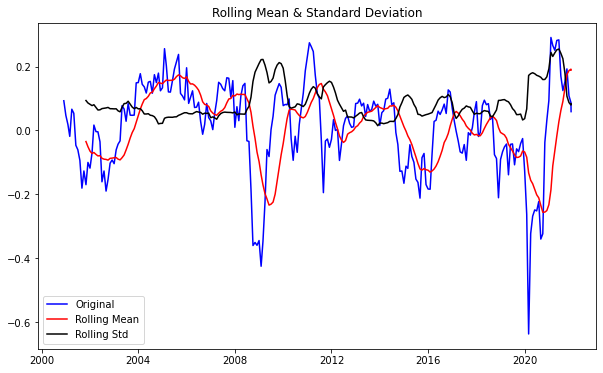

Results of Dickey Fuller Test:
Test Statistic                  -4.095574
p-value                          0.000985
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [63]:
test_stationarity(datasetLogScaleMinusMovingAverage)



From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

  p-value has reduced from 0.316652 to 0.000985.
  The critical values at 1%,5%,10% confidence intervals are NOT close to the Test Statistic. Thus, from above 2 points, we cannot say that our given series is stationary.

In the spirit of getting higher accuracy, let us explore & try to find a better scale than our current log.

Let us try out Exponential decay.



#Exponential Decay Transformation 

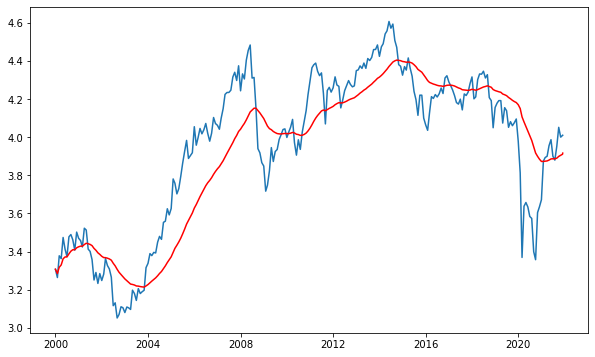

In [64]:
exponentialDecayWeightedAverage = indexedXLE_monthly_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedXLE_monthly_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

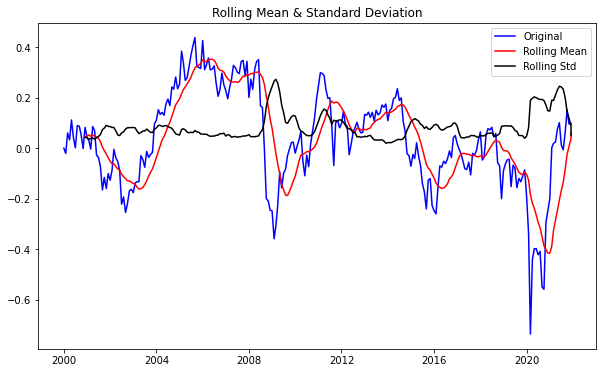

Results of Dickey Fuller Test:
Test Statistic                  -2.998721
p-value                          0.035014
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [67]:
datasetLogScaleMinusExponentialMovingAverage = indexedXLE_monthly_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

#p-value is not very good and the series for moving avg & std. dev. is not parallel to x-axis

#Time Shift Transformation 

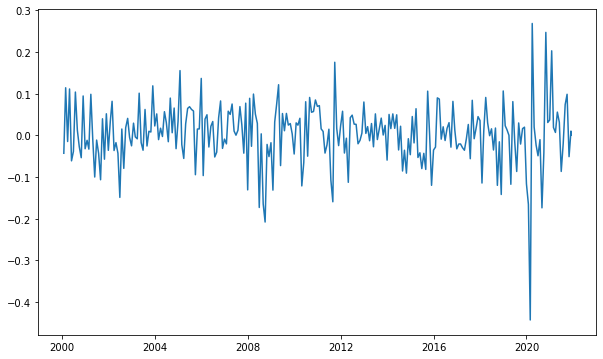

In [68]:
datasetLogDiffShifting = indexedXLE_monthly_logScale - indexedXLE_monthly_logScale.shift()
plt.plot(datasetLogDiffShifting)


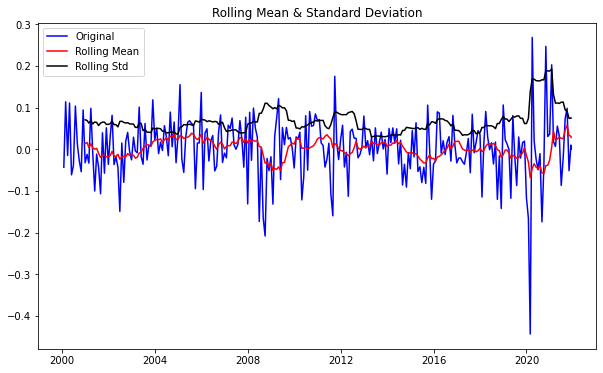

Results of Dickey Fuller Test:
Test Statistic                -1.668329e+01
p-value                        1.509967e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.630000e+02
Critical Value (1%)           -3.455461e+00
Critical Value (5%)           -2.872593e+00
Critical Value (10%)          -2.572660e+00
dtype: float64


In [69]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.
Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

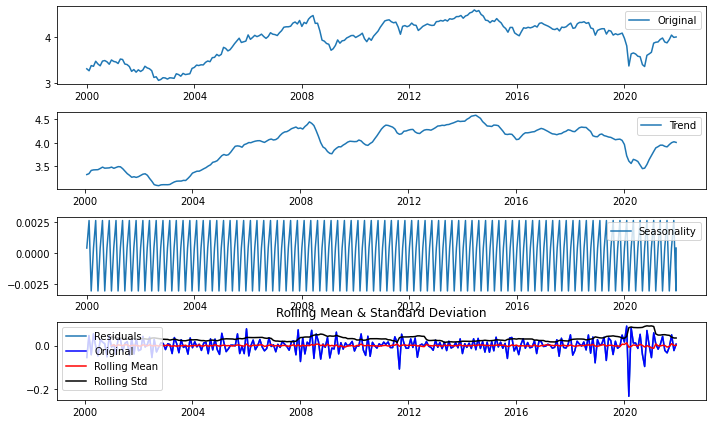

Results of Dickey Fuller Test:
Test Statistic                -7.284604e+00
p-value                        1.470007e-10
#Lags Used                     1.300000e+01
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


In [71]:
decomposition = seasonal_decompose(indexedXLE_monthly_logScale, freq=3) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedXLE_monthly_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

#Plotting ACF & PACF


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



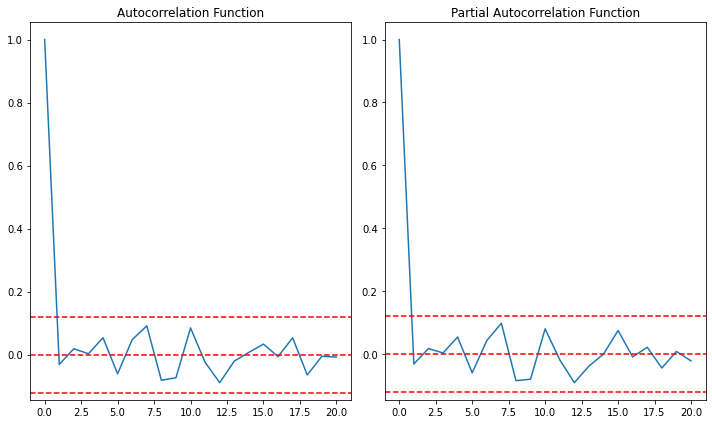

In [72]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            



From the ACF graph, we see that curve touches y=0 and it crosses the first line at x= 1. Thus, from theory, Q = 1 From the PACF graph, we see that curve touches y=0.0 line and crosses the first line at x=1. Thus, from theory, P =1

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models wi:ll give a value of RSS. Lower RSS values indicate a better model.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting AR model


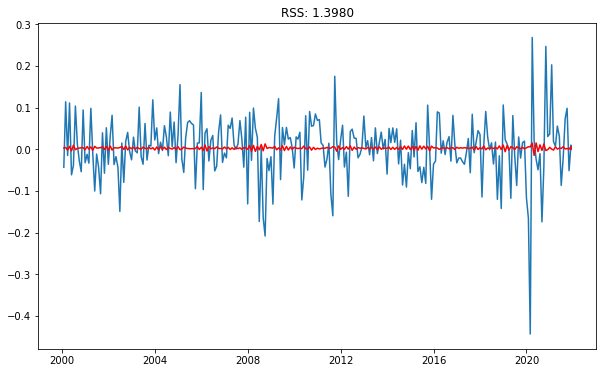

In [75]:
#AR Model
#making order=(1,1,1) gives RSS=1.3980
model = ARIMA(indexedXLE_monthly_logScale, order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting MA model


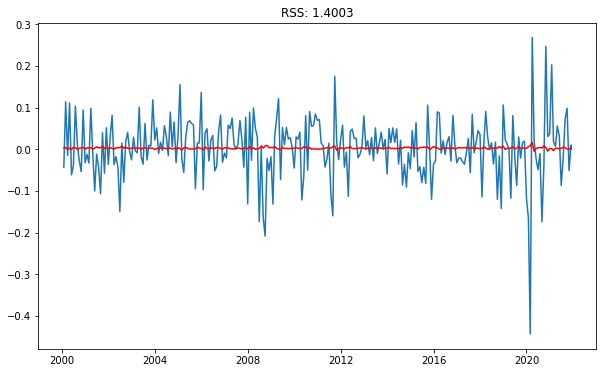

In [76]:
#MA Model
model = ARIMA(indexedXLE_monthly_logScale, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting ARIMA model


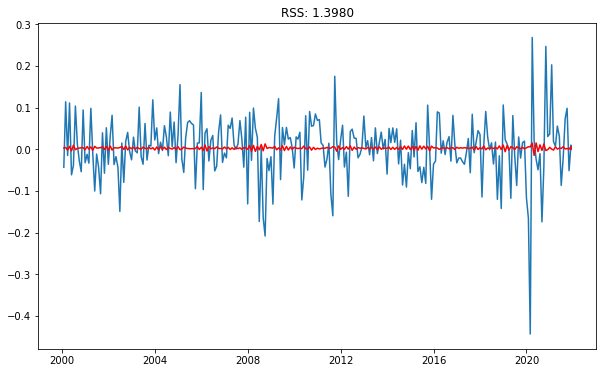

In [79]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedXLE_monthly_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting ARIMA model')

In [80]:
#ARIMA model is not better than AR

#Prediction & Reverse transformations

In [81]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2000-02-01    0.002677
2000-03-01    0.004243
2000-04-01   -0.002180
2000-05-01    0.006860
2000-06-01   -0.003946
dtype: float64


In [82]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)



Date
2000-02-01    0.002677
2000-03-01    0.006921
2000-04-01    0.004741
2000-05-01    0.011601
2000-06-01    0.007655
                ...   
2021-09-01    0.697521
2021-10-01    0.699340
2021-11-01    0.699578
2021-12-01    0.705806
2021-12-03    0.705612
Length: 264, dtype: float64


In [83]:
predictions_ARIMA_log = pd.Series(indexedXLE_monthly_logScale['Close'].iloc[0], index=indexedXLE_monthly_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()



Date
2000-01-01    3.307344
2000-02-01    3.310022
2000-03-01    3.314265
2000-04-01    3.312085
2000-05-01    3.318945
dtype: float64

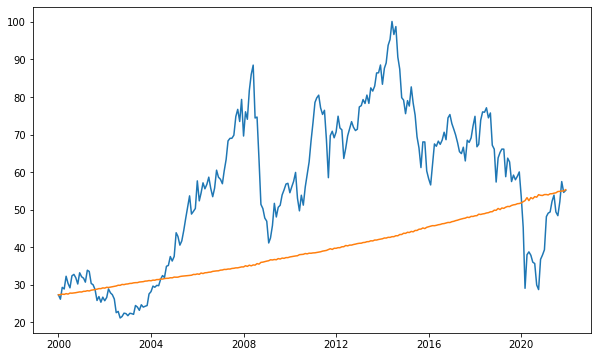

In [85]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedXLE_monthly)
plt.plot(predictions_ARIMA)


In [87]:
indexedXLE_monthly_logScale

,Close
Date,
2000-01-01,3.307344
2000-02-01,3.264088
2000-03-01,3.378014
2000-04-01,3.362976
2000-05-01,3.474002
...,...
2021-09-01,3.952973
2021-10-01,4.051263
2021-11-01,3.999851


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



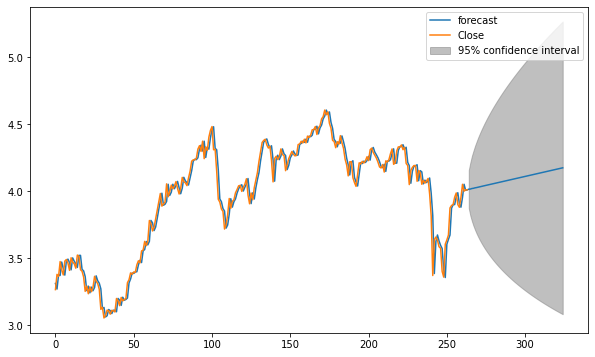

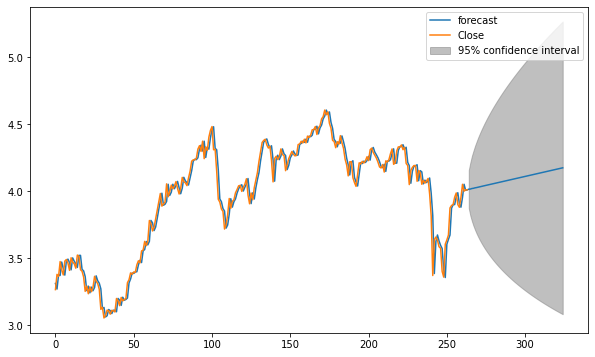

In [88]:
#We have 265(existing data of 20 yrs in months) data points. 
#And we want to forecast for additional 60 data points for 5 yrs.
results_ARIMA.plot_predict(1,325) 


